This code tests how correlation cha

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import winsound
import scipy.stats as stt
import networkx as nx 

import random

# Main functions

In [11]:
def gauss(x,A,mu,sig):
    f = A * np.exp(-0.5*((x-mu)**2)/(sig**2))
    return f

In [4]:
def phi_f(x,y1,y2,p):
    n11 = np.sum(y1*y2*p)*dx
    n10 = np.sum(y1*(1-y2)*p)*dx
    n01 = np.sum(y2*(1-y1)*p)*dx
    n00 = np.sum((1-y1)*(1-y2)*p)*dx

    n1_ = np.sum(y1*p)*dx
    n0_ = np.sum((1-y1)*p)*dx
    n_1 = np.sum(y2*p)*dx
    n_0 = np.sum((1-y2)*p)*dx

    num = n11*n00 - n10*n01
    den = n1_ * n0_ * n_1 * n_0
    
    phi = num / np.sqrt(den)
    
    return phi
    

In [5]:
def phi_s1(x,y1,y2,p):
    I = np.sum(y1*y2*p)*dx

    b1 = np.sum(y1*p)*dx
    b2 = np.sum(y2*p)*dx

    phi = (I - b1*b2) / np.sqrt(b1*b2*(1-b1)*(1-b2))
    
    return phi

In [6]:
def phi_s2(x,y1,y2,p):
    I = np.sum(y1*y2*p)*dx
    b = np.sum(y1*p)*dx

    phi = (I-b**2)/(b*(1-b))
    
    return phi

In [7]:
# Simulate people answering the survey
def phi_sim(x,y1,y2,p,N):
    p1 = p/np.max(p)
    
    v1 = []
    v2 = []
    
    index = range(0,len(x))
    
    for p_ in range(0,N): # for each person
        
        finito = False
        
        # select the position of the person
        while not finito:
            ni = random.choice(index)
            
            if p[ni] > np.random.rand():
                finito = True
                
                xi = x[ni]
                
        # Answer the two questions
        y1i = y1[ni]
        y2i = y2[ni]
        
        if y1i > np.random.rand():
            v1.append(1)
        else:
            v1.append(0)
            
        if y2i > np.random.rand():
            v2.append(1)
        else:
            v2.append(0)
            
    phi = stt.spearmanr(v1,v2)
    
    return phi        
    

In [8]:
def overlap(x,y1,y2,p):
    I = np.sum(y1*y2*p)*dx
    return I

Check that the different phi values coincides

-0.31618244951807845
-0.32265397765476334
-0.3166215104053448
-0.31662151040534486


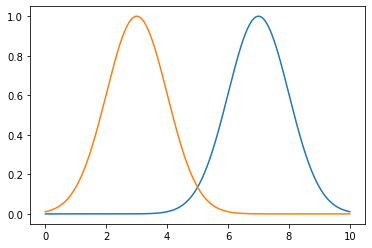

In [9]:
# define the space
dx = 0.01
x_min = 0
x_max = 10
x = np.arange(x_min,x_max+dx,dx)

N = 10000

A1 = 1
sig1 = 1
mu1 = 7

A2 = A1
sig2 = sig1
mu2 = mu1-4

y1 = gauss(x,A1,mu1,sig1)
y2 = gauss(x,A2,mu2,sig2)

p = x*0+1/(x_max-x_min)

phi1 = phi_f(x,y1,y2,p)
phi2 = phi_sim(x,y1,y2,p,N)
phi_app1 = phi_s1(x,y1,y2,p)
phi_app2 = phi_s2(x,y1,y2,p)

print(phi1)
print(phi2[0])
print(phi_app1)
print(phi_app2)

plt.plot(x,y1)
plt.plot(x,y2)

# Test correlation VS overlap

Change position of the curves

Text(0, 0.5, 'Correlation')

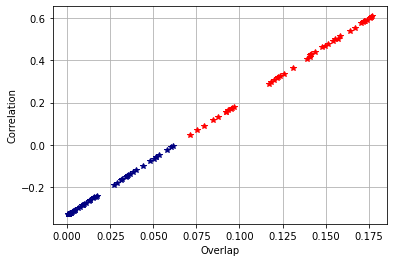

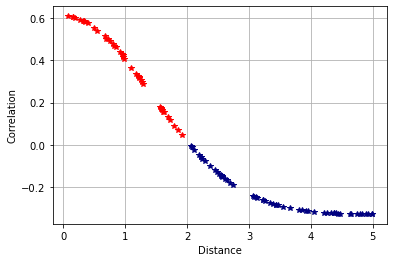

In [10]:
# define the space
dx = 0.01
x_min = 0
x_max = 10
x = np.arange(x_min,x_max+dx,dx)

N_rep = 100

A1 = 1
sig1 = 1

sig2 = sig1
A2 = A1

mu1 = 7

I_v = []
d_v = []
phi_v = []

for i in range(0,N_rep):

    mu2 = np.random.rand()*6+2 ##### We do not allow to get too close to the edges

    y1 = gauss(x,A1,mu1,sig1)
    y2 = gauss(x,A2,mu2,sig2)

    p = x*0+1/(x_max-x_min)

    phi1 = phi_f(x,y1,y2,p)
    phi_app1 = phi_s1(x,y1,y2,p)
    
    I = overlap(x,y1,y2,p)
    d = np.abs(mu1-mu2)
    
    if np.abs(phi1 - phi_app1) > 0.01:
        raise Exeption("The two phi do not coincide!")
        
    I_v.append(I)
    d_v.append(d)
    phi_v.append(phi1)

I_v = np.array(I_v)
d_v = np.array(d_v)
phi_v = np.array(phi_v)

plt.figure()
plt.grid()
# plt.plot(I_v,phi_v,'*')
plt.plot(I_v[phi_v<0],phi_v[phi_v<0],'*',color='navy')
plt.plot(I_v[phi_v>=0],phi_v[phi_v>=0],'*',color='r')
plt.xlabel('Overlap')
plt.ylabel('Correlation')

plt.figure()
plt.grid()
# plt.plot(d_v,phi_v,'*')
plt.plot(d_v[phi_v<0],phi_v[phi_v<0],'*',color='navy')
plt.plot(d_v[phi_v>=0],phi_v[phi_v>=0],'*',color='r')
plt.xlabel('Distance')
plt.ylabel('Correlation')
    